In [1]:
# Install required packages (run this cell once)
import sys

# Use the same Python executable the notebook is running with
!{sys.executable} -m pip install --upgrade nptdms numpy matplotlib plotly


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Imports
from nptdms import TdmsFile
import numpy as np
import matplotlib.pyplot as plt
import os

# plt.style.use('seaborn-darkgrid')

In [15]:
# Edit this list with paths to your TDMS files (absolute or relative to this notebook)
# Example: r"2025_11_19_18_06_39_Fwd Gain-Test_DriveAmp_15OhmLoad_20xDiffProbe_F100-60000_N-100.tdms"
FILES = [r"2025_11_19_18_06_39_Fwd Gain-Test_DriveAmp_15OhmLoad_20xDiffProbe_F100-60000_N-100.tdms",
         r"2025_11_21_11_07_49_Fwd Gain-DriveAmp_6OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r"2025_11_21_10_57_29_Fwd Gain-DriveAmp_4OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r"2025_11_21_10_52_35_Fwd Gain-DriveAmp_3OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r"2025_11_19_18_30_27_Fwd Gain-Test_DriveAmp_2OhmLoad_20xDiffProbe_F100-60000_N-100.tdms",
         r"2025_11_19_20_32_01_Fwd Gain-Test_DriveAmp_2OhmLoad_20xDiffProbe_F100-60000_N-100.tdms"]

NAMES = [r"15 Ohm Load",
         r"6 Ohm Load",
         r"4 Ohm Load",
         r"3 Ohm Load",
         r"2 Ohm Load",
         r"2 Ohm Load, Low BW"]
# Edit this list with paths to your TDMS files (absolute or relative to this notebook)
# Example: r"2025_11_19_18_06_39_Fwd Gain-Test_DriveAmp_15OhmLoad_20xDiffProbe_F100-60000_N-100.tdms"
FILES_FERRITE = [r"2025_11_19_17_57_16_Fwd Gain-Test_BiasAmp_15OhmLoad_20xDiffProbe_F100-60000_N- 50.tdms",
         r"2025_11_21_11_05_55_Fwd Gain-BiasAmp_6OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r"2025_11_21_10_59_35_Fwd Gain-BiasAmp_4OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r"2025_11_21_11_02_29_Fwd Gain-BiasAmp_3OhmLoad_20XProbe_F100-60000_N-200.tdms",
         r""]

NAMES_FERRITE = [r"15 Ohm Load",
         r"6 Ohm Load",
         r"4 Ohm Load",
         r"3 Ohm Load",
         r"2 Ohm Load"]

FILES_LOWFREQ = [r"2025_11_21_13_30_42_Fwd Gain-BiasAmp_6OhmLoad_20XProbeLowFreq_F  0-100_N- 50.tdms",
                 r"2025_11_21_14_13_52_Fwd Gain-DriveAmp_6OhmLoad_20XProbeLowFreq_F0-100_N-200.tdms"]

NAMES_LOWFREQ = [r"Jumpers (J4/5) installed",
         r"Jumpers (J4/5) not populated"]

In [4]:
def load_tdms_file(path, group='Measured Data'):
    """Load `Freq`, `Mag`, `Phase` arrays from a TDMS file.
    Returns (freq, mag, phase) as numpy arrays.
    If channels are missing, raises a KeyError.
    """
    td = TdmsFile.read(path)
    grp = td[group]
    freq = np.asarray(grp['Freq'].data)
    mag = np.asarray(grp['Mag'].data)
    phase = np.asarray(grp['Phase'].data)
    return freq, mag, phase

def load_tdms_file_harmonic(path, group='Measured Data'):
    """Load `Freq`, `Mag`, `Phase` arrays from a TDMS file.
    Returns (freq, mag, phase) as numpy arrays.
    If channels are missing, raises a KeyError.
    """
    td = TdmsFile.read(path)
    grp = td[group]
    freq = np.asarray(grp['Freq'].data)
    mag = np.asarray(grp['Mag/f0'].data)
    phase = np.asarray(grp['Phase'].data)
    return freq, mag, phase


def load_tdms_file_Settings(path, group='Acq Settings'):
    """Load `Freq`, `Mag`, `Phase` arrays from a TDMS file.
    Returns (freq, mag, phase) as numpy arrays.
    If channels are missing, raises a KeyError.
    """
    td = TdmsFile.read(path)
    grp = td[group]
    SendAmps = np.asarray(grp['Sending Amplitude'].data)

    return SendAmps

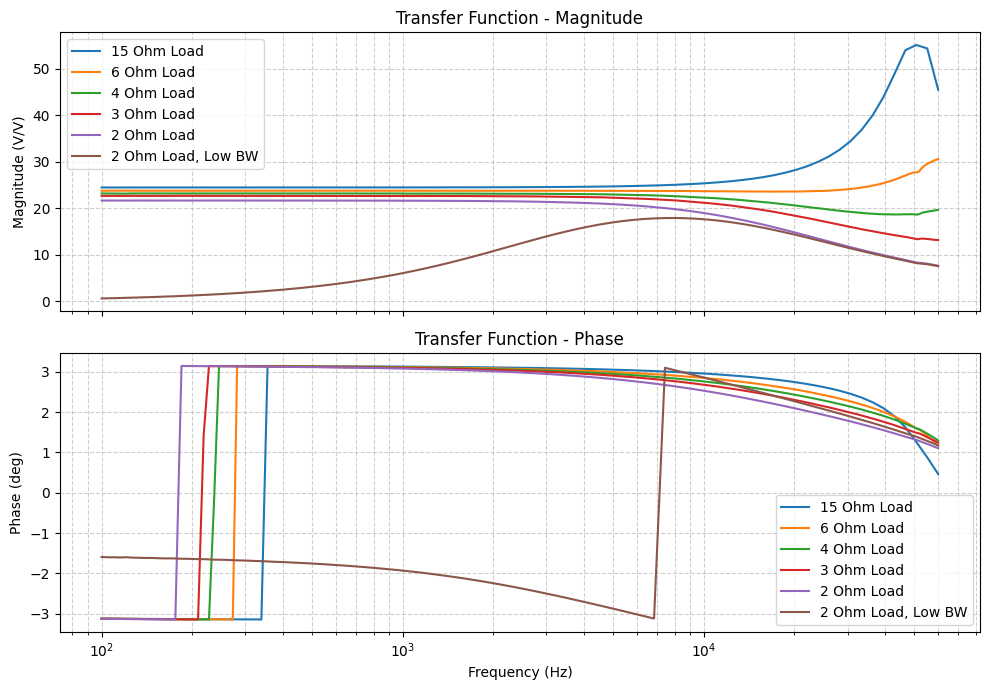

Saved gain plot to c:\Users\elima\OneDrive\Documents\GitHub\TPA3255_ClassD_PBTL\Amplifier Measurements\TF_Gain.png


In [5]:
# Plot magnitude and phase (two stacked subplots)
i = 0
if not FILES:
    print('No files provided. Edit the FILES list and run this cell.')
else:
    plt.rcParams['figure.figsize'] = (10, 7)
    fig, (ax_mag, ax_ph) = plt.subplots(2, 1, sharex=True)
    for fpath in FILES:
        if not os.path.isfile(fpath):
            print(f'File not found: {fpath}')
            continue
        try:
            freq, mag, phase = load_tdms_file(fpath)
        except Exception as e:
            print(f'Error reading {fpath}:', e)
            continue
        label = NAMES[i]
        i += 1
        # Magnitude (V/V) vs Frequency
        ax_mag.semilogx(freq, mag*20, label=label)
        # Phase (deg) vs Frequency
        ax_ph.semilogx(freq, phase, label=label)

    ax_mag.set_ylabel('Magnitude (V/V)')
    ax_mag.set_title('Transfer Function - Magnitude')
    ax_mag.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_mag.legend()

    ax_ph.set_xlabel('Frequency (Hz)')
    ax_ph.set_ylabel('Phase (deg)')
    ax_ph.set_title('Transfer Function - Phase')
    ax_ph.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_ph.legend()

    plt.tight_layout()
    plt.show()

    out_fn = 'TF_Gain.png'
    out_path = os.path.join(os.getcwd(), out_fn)
    fig.savefig(out_path, dpi=300)
    print('Saved gain plot to', out_path)

File not found: 


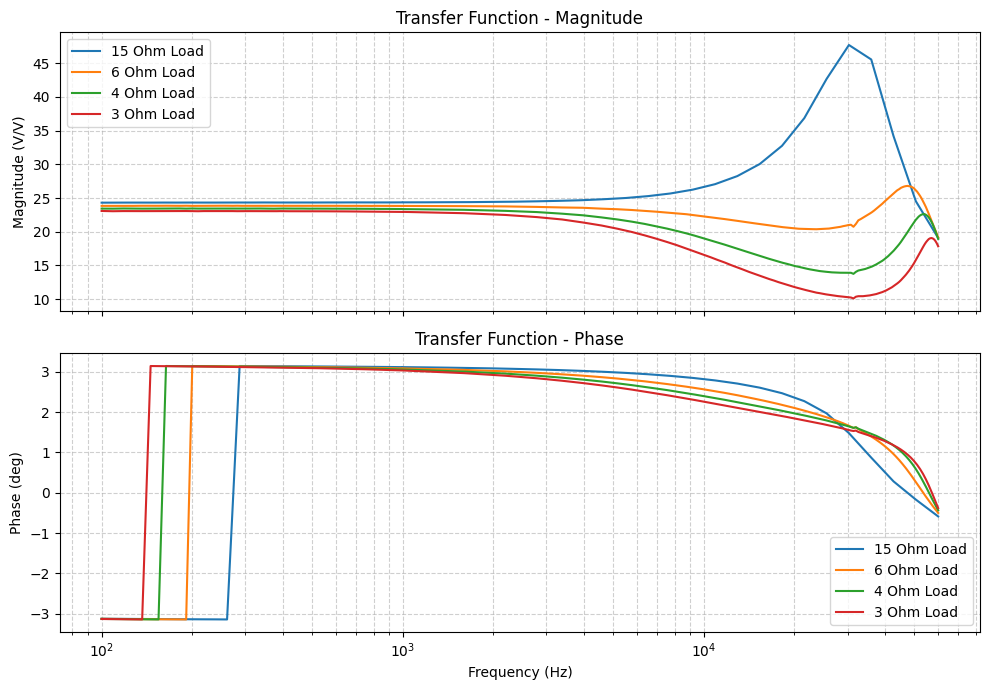

Saved gain plot to c:\Users\elima\OneDrive\Documents\GitHub\TPA3255_ClassD_PBTL\Amplifier Measurements\TF_Gain_FerriteFilt.png


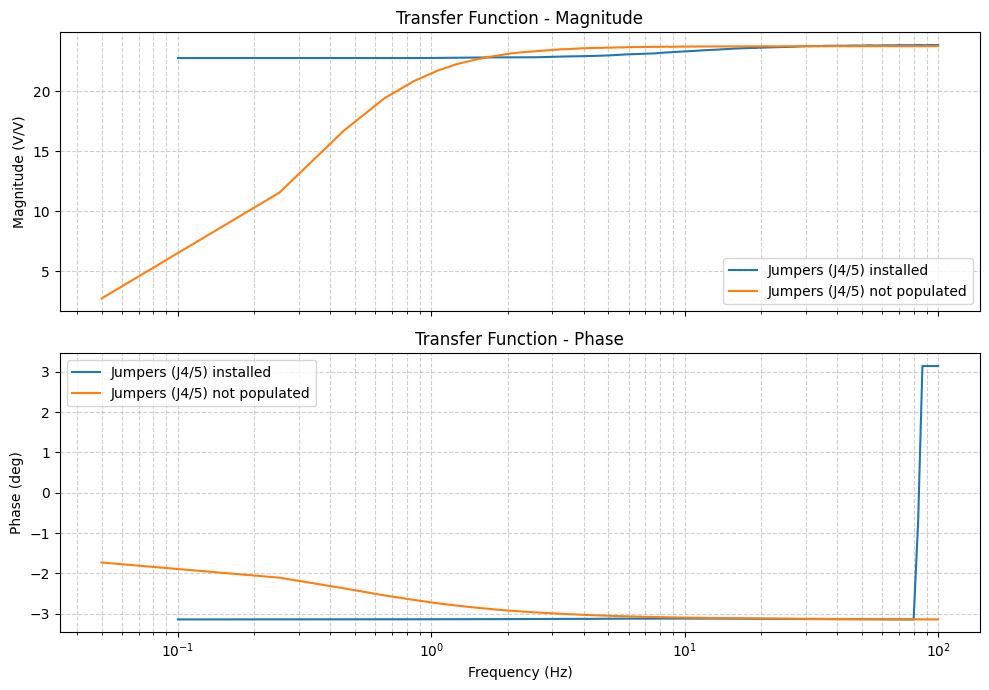

Saved gain plot to c:\Users\elima\OneDrive\Documents\GitHub\TPA3255_ClassD_PBTL\Amplifier Measurements\TF_Gain_LOWFREQ.png


In [16]:
# Plot magnitude and phase (two stacked subplots)
i = 0
if not FILES_FERRITE:
    print('No files provided. Edit the FILES list and run this cell.')
else:
    plt.rcParams['figure.figsize'] = (10, 7)
    fig, (ax_mag, ax_ph) = plt.subplots(2, 1, sharex=True)
    for fpath in FILES_FERRITE:
        if not os.path.isfile(fpath):
            print(f'File not found: {fpath}')
            continue
        try:
            freq, mag, phase = load_tdms_file(fpath)
        except Exception as e:
            print(f'Error reading {fpath}:', e)
            continue
        label = NAMES_FERRITE[i]
        i += 1
        # Magnitude (V/V) vs Frequency
        ax_mag.semilogx(freq, mag*20, label=label)
        # Phase (deg) vs Frequency
        ax_ph.semilogx(freq, phase, label=label)

    ax_mag.set_ylabel('Magnitude (V/V)')
    ax_mag.set_title('Transfer Function - Magnitude')
    ax_mag.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_mag.legend()

    ax_ph.set_xlabel('Frequency (Hz)')
    ax_ph.set_ylabel('Phase (deg)')
    ax_ph.set_title('Transfer Function - Phase')
    ax_ph.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_ph.legend()

    plt.tight_layout()
    plt.show()

    out_fn = 'TF_Gain_FerriteFilt.png'
    out_path = os.path.join(os.getcwd(), out_fn)
    fig.savefig(out_path, dpi=300)
    print('Saved gain plot to', out_path)



    # Plot magnitude and phase (two stacked subplots)
i = 0
if not FILES_LOWFREQ:
    print('No files provided. Edit the FILES list and run this cell.')
else:
    plt.rcParams['figure.figsize'] = (10, 7)
    fig, (ax_mag, ax_ph) = plt.subplots(2, 1, sharex=True)
    for fpath in FILES_LOWFREQ:
        if not os.path.isfile(fpath):
            print(f'File not found: {fpath}')
            continue
        try:
            freq, mag, phase = load_tdms_file(fpath)
        except Exception as e:
            print(f'Error reading {fpath}:', e)
            continue
        label = NAMES_LOWFREQ[i]
        i += 1
        # Magnitude (V/V) vs Frequency
        ax_mag.semilogx(freq, mag*20, label=label)
        # Phase (deg) vs Frequency
        ax_ph.semilogx(freq, phase, label=label)

    ax_mag.set_ylabel('Magnitude (V/V)')
    ax_mag.set_title('Transfer Function - Magnitude')
    ax_mag.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_mag.legend()

    ax_ph.set_xlabel('Frequency (Hz)')
    ax_ph.set_ylabel('Phase (deg)')
    ax_ph.set_title('Transfer Function - Phase')
    ax_ph.grid(True, which='both', linestyle='--', alpha=0.6)
    ax_ph.legend()

    plt.tight_layout()
    plt.show()

    out_fn = 'TF_Gain_LOWFREQ.png'
    out_path = os.path.join(os.getcwd(), out_fn)
    fig.savefig(out_path, dpi=300)
    print('Saved gain plot to', out_path)

In [ ]:
# LIA THD plotting: plot harmonics vs frequency for each send amplitude
# 'Measured f0 Data-Send Amp = X', 'Measured Harmonic Data- 1f0-Send Amp X', 'Measured Harmonic Data- 2f0-Send Amp X'
# Configure LIA_FILES with your TDMS files containing the LIA measurements
LIA_FILES = [r"2025_11_19_18_03_16_LIA_THD-Test_BiasAmp_15OhmLoad_20xDiffProbe_F100-25000_N- 10.tdms",
             r"2025_11_19_18_10_59_LIA_THD-Test_DriveAmp_15OhmLoad_20xDiffProbe_F100-25000_N- 10.tdms",
             r"2025_11_19_18_38_52_LIA_THD-Test_DriveAmp_2OhmLoad_20xDiffProbe_F100-25000_N- 10.tdms"]
SEND_AMPS = [0, 1, 2]  # values of X present in the groups

# Use existing loader to read group data: load_tdms_file(path, group=...)
# It returns (freq, mag, phase) arrays; we'll use `mag` as the representative amplitude

for fpath in LIA_FILES:
    if not os.path.isfile(fpath):
        print('File not found:', fpath)
        continue

    fig, (ax2, ax3) = plt.subplots(2, 1, sharex=True, figsize=(10, 7))
    plotted_any = False

    for X in SEND_AMPS:
        g_f0 = f'Measured f0 Data-Send Amp = {X}'
        g_h2 = f'Measured Harmonic Data- 1f0-Send Amp {X}'
        g_h3 = f'Measured Harmonic Data- 1f0-Send Amp {X}'

        
        freq0, mag0, _ = load_tdms_file(fpath, group=g_f0)
        _ , h2_pct, _ = load_tdms_file_harmonic(fpath, group=g_h2)
        _ , h3_pct, _ = load_tdms_file_harmonic(fpath, group=g_h3)
        AmpVal =np.round(load_tdms_file_Settings(fpath)*23)
        h2_pct = h2_pct*100
        h3_pct = h3_pct*100

        label = f"Send Amp ≈ {int(AmpVal[X])} Vpk"

        ax2.semilogx(freq0, h2_pct, marker='.', linestyle='-', label=label)
        ax3.semilogx(freq0, h3_pct, marker='.', linestyle='-', label=label)
        plotted_any = True

    ax2.set_ylabel('2nd Harmonic (%)')
    ax2.set_title(f'2nd Harmonic vs Frequency - {os.path.basename(fpath)}')
    ax2.grid(True, which='both', linestyle='--', alpha=0.6)
    ax2.legend()

    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('3rd Harmonic (%)')
    ax3.set_title(f'3rd Harmonic vs Frequency - {os.path.basename(fpath)}')
    ax3.grid(True, which='both', linestyle='--', alpha=0.6)
    ax3.legend()

    plt.tight_layout()
    out_name = f"LIA_THD_vs_freq_{os.path.splitext(os.path.basename(fpath))[0]}.png"
    out_path = os.path.join(os.getcwd(), out_name)
    fig.savefig(out_path, dpi=300)
    print('Saved LIA THD vs frequency plot to', out_path)

    if plotted_any:
        plt.show()
    else:
        plt.close(fig)
        print('No harmonic data plotted for', fpath)



Saved output noise plots to c:\Users\elima\OneDrive\Documents\GitHub\TPA3255_ClassD_PBTL\Amplifier Measurements\Output_NoiseDensity_withZoom.png


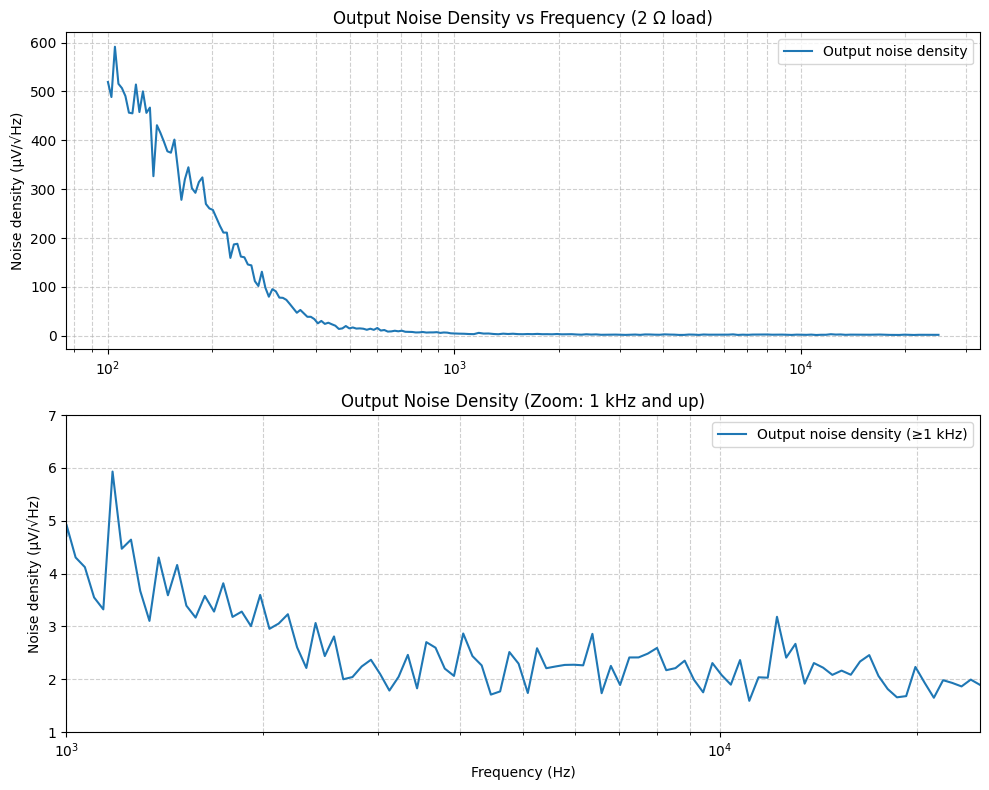

In [23]:
# Output noise density plot for 2 Ω load with zoomed pane

NOISE_FILE = r"2025_11_19_19_25_22_Test_DriveAmp_2OhmLoad_20xDiffProbe_F100-25000_N-200.tdms"

if not os.path.isfile(NOISE_FILE):
    print(f"File not found: {NOISE_FILE}")
else:
    freq, noise_mag, noise_phase = load_tdms_file(NOISE_FILE)
    noise_mag = noise_mag*20*1e6  # Convert V/V to µV/√Hz and apply 20x probe gain
    fig, (ax_full, ax_zoom) = plt.subplots(2, 1, figsize=(10, 8))

    # Full band
    ax_full.semilogx(freq, noise_mag, label="Output noise density")
    ax_full.set_ylabel("Noise density (µV/√Hz)")
    ax_full.set_title("Output Noise Density vs Frequency (2 Ω load)")
    ax_full.grid(True, which="both", linestyle="--", alpha=0.6)
    ax_full.legend()

    # Zoomed view from 1 kHz onward
    ax_zoom.semilogx(freq, noise_mag, label="Output noise density (≥1 kHz)")
    ax_zoom.set_xlim(1e3, freq.max())
    ax_zoom.set_ylim(1, 7)
    ax_zoom.set_xlabel("Frequency (Hz)")
    ax_zoom.set_ylabel("Noise density (µV/√Hz)")
    ax_zoom.set_title("Output Noise Density (Zoom: 1 kHz and up)")
    ax_zoom.grid(True, which="both", linestyle="--", alpha=0.6)
    ax_zoom.legend()

    plt.tight_layout()
    out_name = "Output_NoiseDensity_withZoom.png"
    out_path = os.path.join(os.getcwd(), out_name)
    fig.savefig(out_path, dpi=300)
    print("Saved output noise plots to", out_path)

    plt.show()
